**Imports**

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import time

**Load Dataset: MNIST**

In [ ]:
#IMG_CHANNELS = 1; IMG_ROWS = 28; IMG_COLS = 28;

#constant
#BATCH_SIZE = 128; NB_EPOCH = 50; NB_CLASSES = 10; VERBOSE = 1; VALIDATION_SPLIT = 0.2;

#load dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = X_train.reshape(X_train.shape[0], IMG_ROWS, IMG_COLS, 1)
#X_test = X_test.reshape(X_test.shape[0], IMG_ROWS, IMG_COLS, 1)

11493376/11490434 [==============================] - 1s 0us/step


**Load Dataset:** **CIFAR10**

In [ ]:
# CIFAR_10 is set of 60K images 32x32 pixels, 3 channels
IMG_CHANNELS = 3; IMG_ROWS = 32; IMG_COLS = 32;

#constant
BATCH_SIZE = 128; NB_EPOCH = 50; NB_CLASSES = 10; VERBOSE = 1; VALIDATION_SPLIT = 0.2;

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# Check DataSet statistics
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float
X_train = X_train.astype('float32'); X_test = X_test.astype('float32');

# normalization (for CIFAR10)
X_train /= 255; X_test /= 255;


**VGG16 CNN Model**

In [ ]:
model = Sequential()

# Convolutional Layer1 and Pooling Layer1
model.add(ZeroPadding2D((1,1), input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer2 and Pooling Layer2
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer3 and Pooling Layer3
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer4 and Pooling Layer4
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Convolutional Layer5 and Pooling Layer5
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters = 512, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))  # Uncomment while using CIFAR10 DataSet
#model.add(MaxPooling2D(pool_size=(1,1), strides=(2,2))) # Uncomment while using MNIST DataSet

# FC Layers
model.add(Flatten())
#top layer of the VGG net
model.add(Dense(units = 4096, activation='relu')); model.add(Dropout(0.5))
model.add(Dense(units = 4096, activation='relu')); model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)      

**Training**

In [ ]:
start_time = time.time()

#================================================================================================
## Training

model.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['accuracy'])


history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

#================================================================================================
## Testing
print('Testing...')
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0]); print('Test accuracy:', score[1]);

# save model
model_json = model.to_json()
open('architecture_VGG16.json', 'w').write(model_json)
model.save_weights('weights_VGG16.h5', overwrite=True)

# list all data in history
print(history.history.keys()); print(history.history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 29s 719us/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1106
Epoch 2/50
40000/40000 [==============================] - 26s 646us/step - loss: 2.3025 - accuracy: 0.1007 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/50
40000/40000 [==============================] - 26s 638us/step - loss: 2.3025 - accuracy: 0.1013 - val_loss: 2.3025 - val_accuracy: 0.0952
Epoch 4/50
40000/40000 [==============================] - 25s 637us/step - loss: 2.3024 - accuracy: 0.1024 - val_loss: 2.3024 - val_accuracy: 0.0952
Epoch 5/50
40000/40000 [==============================] - 26s 640us/step - loss: 2.3023 - accuracy: 0.1024 - val_loss: 2.3023 - val_accuracy: 0.0952
Epoch 6/50
40000/40000 [==============================] - 26s 639us/step - loss: 2.3022 - accuracy: 0.1054 - val_loss: 2.3022 - val_accuracy: 0.0952
Epoch 7/50
40000/40000 [==============================] 

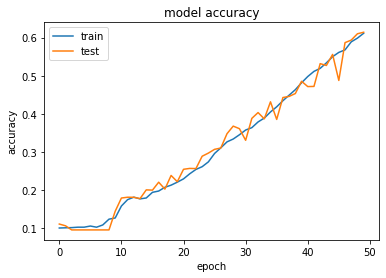

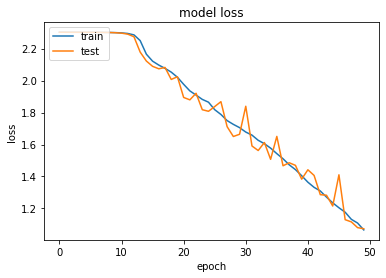


Execution Time 1315.3429980278015 seconds: 


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy']);
plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch'); 
plt.legend(['train', 'test'], loc='upper left'); plt.show()

# summarize history for loss
plt.plot(history.history['loss']); plt.plot(history.history['val_loss']);
plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper left'); plt.show()
print(); print("Execution Time %s seconds: " % (time.time() - start_time))